In [2]:
class Empty(Exception):
    pass
class LinkedStack:
 #--- -Node class- ---
    class _Node:
        __slots__ = '_element', '_next' #faster memory access

        def __init__(self,element,next):
            self._element = element
            self._next = next

 #--- -Stack methods- ---
    def __init__(self): #empty stack
        self._head = None
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def push(self,e):
        self._head = self._Node(e,self._head)
        self._size += 1

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        return self._head._element

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer
    

In [3]:
import time
def stoper(liczba_pomiarow):
    ns = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
    push_time = []
    is_empty_time = []
    len_time = []
    top_time = []
    pop_time = []
    s = LinkedStack()
    while len(s) <= 10000000:
        s.push(1)
        if len(s) in ns:
            push_sum = 0
            is_empty_sum = 0
            len_sum = 0
            top_sum = 0
            pop_sum = 0
            for j in range(liczba_pomiarow):
                start_push = time.time()
                s.push(1)
                end_push = time.time()
                s.pop()
                push_sum += end_push-start_push
                start_is_empty = time.time()
                s.is_empty()
                end_is_empty = time.time()
                is_empty_sum += end_is_empty-start_is_empty
                start_len = time.time()
                len(s)
                end_len = time.time()
                len_sum += end_len-start_len
                start_top = time.time()
                s.top()
                end_top = time.time()
                top_sum += end_top-start_top
                start_pop = time.time()
                s.pop()
                end_pop = time.time()
                pop_sum += end_pop-start_pop
                s.push(1)
            push_time.append((push_sum)/liczba_pomiarow)
            is_empty_time.append((is_empty_sum)/liczba_pomiarow)
            len_time.append((len_sum)/liczba_pomiarow)
            top_time.append((top_sum)/liczba_pomiarow)
            pop_time.append((pop_sum)/liczba_pomiarow)

    return push_time, is_empty_time, len_time, top_time, pop_time


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


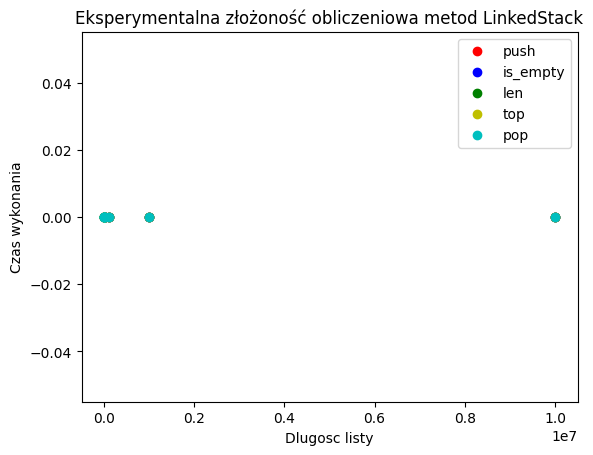

In [4]:

import matplotlib.pyplot as plt
xs = ns = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
push_time, is_empty_time, len_time, top_time, pop_time = stoper(100)
print(push_time, is_empty_time, len_time, top_time, pop_time)
plt.plot(xs, push_time, "ro", label="push")
plt.plot(xs, is_empty_time, "bo", label="is_empty")
plt.plot(xs, len_time, "go", label = "len")
plt.plot(xs, top_time, "yo", label = "top")
plt.plot(xs, pop_time, "co", label = "pop")
plt.xlabel("Dlugosc listy")
plt.legend(loc="best")
plt.ylabel("Czas wykonania")
plt.title("Eksperymentalna złożoność obliczeniowa metod LinkedStack")
plt.show()


Zadanie 2

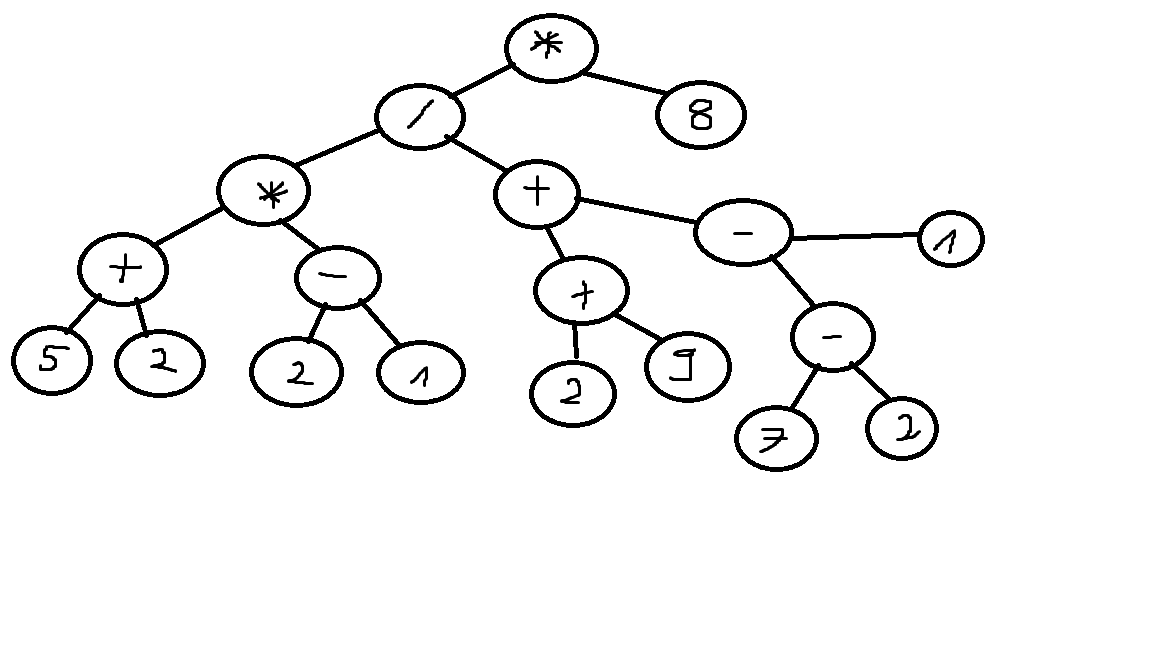

In [23]:
from PIL import Image
from IPython.display import display
img = Image.open("drzewo3.png")
display(img)

Zadanie 3

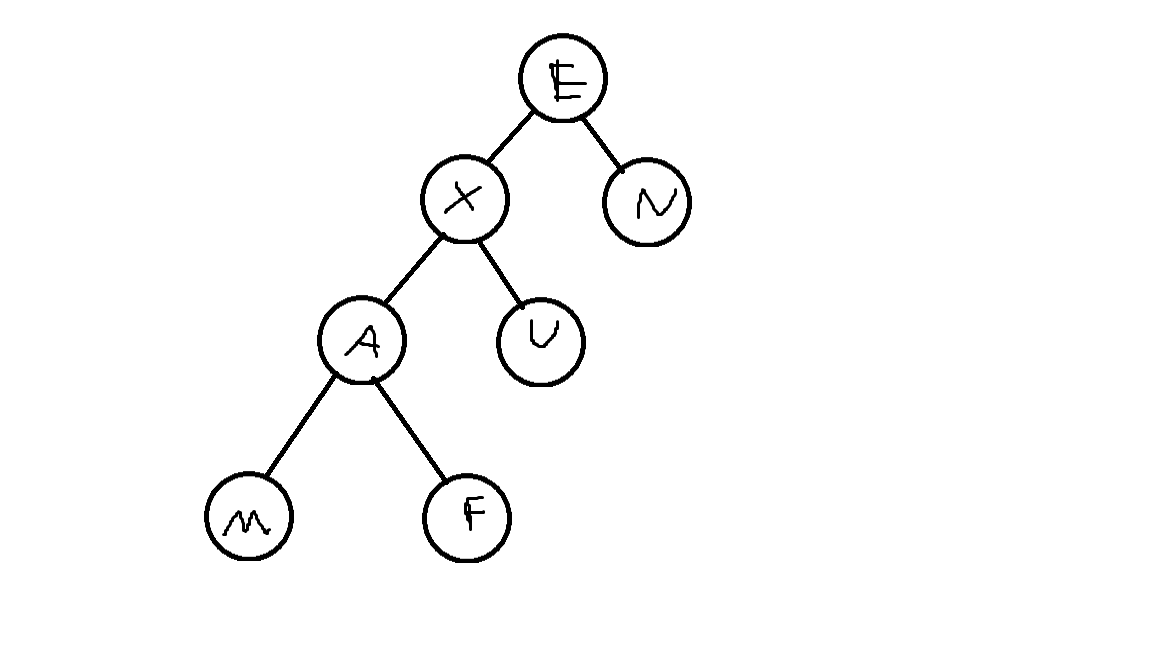

In [2]:
img2 = Image.open("drzewo2.png")
display(img2)

Zadanie 4

In [1]:
class RootError(Exception):
    pass

class ChildError(Exception):
    pass

class ParentError(Exception):
    pass

class NodeError(Exception):
    pass

In [6]:
class BinaryTreeUsingArray():


    def __init__(self):
        self.data = [None] 
        self.size = 0
        self.root = 0
        self.depth = 0

    def set_root(self, value):
        if self.data[self.root] is not None:
            raise RootError("Root already exists")
        else:
            self.data[self.root] = value
        self.size += 1
        self.depth += 1
    
    def add_left_child(self, parent_index, child_value):
        if self.data[parent_index] is None:
            raise ParentError("Parent doesn't exist")
        else:
            child_index = 2 * parent_index + 1
            if self.size == 1:
                self.data += [None] * 2
                self.depth += 1
            elif len(self.data) - 1 < child_index:
                self.data += [None] * 2 ** self.depth
                self.depth += 1
            if self.data[child_index] is not None:
                raise ChildError("Child already exists")
            else:
                self.data[child_index] = child_value
                self.size += 1
    
    def add_right_child(self, parent_index, child_value):
        if self.data[parent_index] is None:
            raise ParentError("Parent doesn't exist")
        else:
            child_index = 2 * parent_index + 2
            if self.size == 1:
                self.data += [None] * 2
                self.depth += 1
            elif len(self.data) - 1 < child_index:
                self.data += [None] * 2 ** self.depth
                self.depth += 1
            if self.data[child_index] is not None:
                raise ChildError("Child already exists")
            else:
                self.data[child_index] = child_value
                self.size += 1

    def get_right_child(self, parent_index):
        child_index = 2 * parent_index + 2
        if self.data[child_index] is None:
            raise ChildError("Child doesn't exists")
        else:
            return self.data[child_index]
    
    def get_left_child(self, parent_index):
        child_index = 2 * parent_index + 1
        if self.data[child_index] is None:
            raise ChildError("Child doesn't exists")
        else:
            return self.data[child_index]
    
    def has_left_child(self, parent_index):
        child_index = 2 * parent_index + 1
        if child_index > len(self.data):
            return False
        else:
            if self.data[child_index] is None:
                return False
            else:
                return True
        
    def has_right_child(self, parent_index):
        child_index = 2 * parent_index + 2
        if child_index > len(self.data):
            return False
        else:
            if self.data[child_index] is None:
                return False
            else:
                return True
        
    def remove_node(self, index):
        if index > len(self.data):
            raise IndexError("Nie istnieje node o podanym indeksie")
        elif self.data[index] == None:
            raise NodeError("Nie istnieje node o podanym indeksie")
        else:
            family = [index]
            cur_index = 0
            left_child_index = 2 * index + 1
            right_child_index = 2 * index + 2
            while left_child_index < len(self.data) - 1:
                family.append(left_child_index)
                family.append(right_child_index)
                cur_index += 1
                left_child_index = 2 * family[cur_index] + 1
                right_child_index = 2 * family[cur_index] + 2
            for i in family:
                self.data[i] = None
        
    def __str__(self):
        return str(self.data)
    




In [7]:
d = BinaryTreeUsingArray()
d.set_root(1)
d.add_left_child(0,2)
d.add_right_child(0,4)
d.add_left_child(1,6)
d.add_right_child(3,8)
d.remove_node(2)
print(d)
print(len(d.data))

[1, 2, 8, 6, None, None, None, None, None, None, None, None, None, None, None]
15


Zadanie 5

In [5]:
class TreeNode:

    def __init__(self, value, left_child=None, right_child=None):
        self.value = value              # string, stored value
        self.left_child = left_child    # None or TreeNode instance
        self.right_child = right_child  # None or TreeNode instance

    def get_value(self):
        return self.value

    def add_left_child(self, value):
        self.left_child(TreeNode(value))

    def add_right_child(self, value):
        self.add_right_child(TreeNode(value))

    def get_left_child(self):
        if self.has_left_child is not None:
            return self.left_child
        else:
            raise ChildError("Left child doesn't exist")

    def get_right_child(self):
        if self.has_right_child:
            return self.right_child
        else:
            raise ChildError("Right child doesn't exist")

    def has_left_child(self) -> bool:
        if self.left_child is not None:
            return True
        else:
            return False

    def has_right_child(self) -> bool:
        if self.right_child is not None:
            return True
        else:
            return False

    def is_leaf(self) -> bool:
        if self.has_left_child or self.has_right_child:
            return True
        else:
            return False

    def __str__(self):
        return str(self.value)
    

In [7]:
import collections
 
class Tree:
    class Position:
        def element(self):
            raise NotImplementedError('must be implem')
        def __eq__(self, other):
            raise NotImplementedError('must be implem')
        def __ne__(self, other):
            return not (self == other)
    def root(self):
        raise NotImplementedError('must be impleme')
    def parent(self, p):
        raise NotImplementedError('must be impleme')
    def num_children(self, p):
        raise NotImplementedError('must be impleme')
    def children(self, p):
        raise NotImplementedError('must be impleme')
    def __len__(self):
        raise NotImplementedError('must be impleme')
 
    def is_root(self, p):
        return self.root() == p
    def is_leaf(self, p):
        return self.num_children(p) == 0
    def is_empty(self):
        return len(self) == 0
    def depth(self, p):
        if self.is_root(p):
            return 0
        else:
            return 1 + self.depth(self.parent(p))
    def _height1(self):
        return max(self.depth(p) for p in self.positions() if self.is_leaf(p))
    def _height2(self,p):
        if self.is_leaf(p):
            return 0
        else:
            return 1 + max(self._height2(c) for c in self.children(p))
 
    def height(self, p=None):
        if p is None:
            p = self.root()
        return self._height2(p)
    def __iter__(self):
        for p in self.positions():
            yield p.element()
    def positions(self):
        return self.preorder()
    def preorder(self):
        if not self.is_empty():
            for p in self._subtree_preorder(self.root()):
                yield p
    def _subtree_preorder(self,p):
        yield p
        for c in self.children(p):
            for other in self._subtree_preorder(c):
                yield other
    def postorder(self):
        if not self.is_empty():
            for p in self._subtree_postorder(self.root()):
                yield p
    def _subtree_postorder(self,p):
        for c in self.children(p):
            for other in self._subtree_postorder(c):
                yield other
        yield p
 

In [8]:
class BinaryTree(Tree):
    def left(self, p):
        raise NotImplementedError()
    def right(self,p):
        raise NotImplementedError()
 
    def sibling(self,p):
        parent = self.parent(p)
        if parent is None:
            return None
        else:
            if p == self.left(parent):
                return self.right(parent)
            else:
                return self.left(parent)
    def children(self,p):
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)
 
    def inorder(self):
        if not self.is_empty():
            for p in self._subtree_inorder(self.root()):
                yield p
 
    def _subtree_inorder(self,p):
        if self.left(p) is not None:
            for other in self._subtree_inorder(self.left(p)):
                yield other
 
    def positions(self):
        return self.inorder()

In [12]:
class LinkedBinaryTree(BinaryTree):
 
    class _Node:
        __slots__ = '_element', '_parent', '_left', '_right'
 
        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right
 
    class Position(BinaryTree.Position):
 
        def __init__(self, container, node):
            self._container = container
            self._node = node
 
        def element(self):
            return self._node._element
 
        def __eq__(self,other):
            return type(other) is type(self) and other._node is self._node
 
    def __len__(self):
        return self._size
 
    def _validate(self, p):
        if not isinstance(p, self.Position):
            raise TypeError('Position is not valid')
        if p._container is not self:
            raise ValueError('Position does not belong to this container')
        if p._node._parent is p._node:  # convention for deprecated nodes
            raise ValueError('Position is no longer valid')
        return p._node

    def _make_position(self, node):
        return self.Position(self, node)

    def root(self):
        return self._make_position(self._root)
 
    def parent(self,p):
        node = self._validate(p)
        return self._make_position(node._parent)
 
    def left(self,p):
        node = self._validate(p)
        return self._make_position(node._left)
 
    def right(self,p):
        node = self._validate(p)
        return self._make_position(node._right)
 
    def num_children(self,p):
        node = self._validate(p)
        count = 0
        if node._left is not None:
            count += 1
        if node._right is not None:
            count += 1
        return count
 
    def add_root(self,e):
        if self._root is not None:
            raise ValueError('Root exists')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)
 
    def add_left(self,p,e):
        node = self._validate(p)
        if node._left is not None:
            raise ValueError('Left child exists')
        self._size += 1
        node._left = self._Node(e,node)
        return self._make_position(node._left)
 
    def add_right(self, p, e):
        node = self._validate(p)
        if node._right is not None:
            raise ValueError('Right child exists')
        self._size += 1
        node._right = self._Node(e, node)
        return self._make_position(node._right)
 
    def replace(self,p,e):
        node = self._validate(p)
        old = node._element
        node._element = e
        return old
 
    def delete(self,p):
        node = self._validate(p)
        if self.num_children(p) == 2:
            raise ValueError('Position has two children')
        child = node._left if node._left else node._right
        if child is not None:
            child._parent = node._parent
        if node is self._root:
            self._root = child
        else:
            parent = node._parent
            if node is parent._left:
                parent._left = child
            else:
                parent._right = child
        self._size -= 1
        node._parent = node
        return node._element
 
    def attach(self,p,t1,t2):
        node = self._validate(p)
        if not self.is_leaf(p):
            raise ValueError('position must be leaf')
        if not type(self) is type(t1) is type(t2):
            raise TypeError('Tree types must match')
        self._size += len(t1) + len(t2)
        if not t1.is_empty():
            t1._root._parent = node
            node._left = t1._root
            t1._root = None
            t1._size = 0
        if not t2.is_empty():
            t2._root._parent = node
            node._right = t2._root
            t2._root = None
            t2._size = 0

In [4]:
def tokenize(raw):
    SYMBOLS = set('+-x*/() ') # allow for '*' or 'x' for multiplication
    mark = 0
    tokens = []
    n = len(raw)
    for j in range(n):
        if raw[j] in SYMBOLS:
            if mark != j:
                tokens.append(raw[mark:j]) # complete preceding token
            if raw[j] != ' ':
                tokens.append(raw[j]) # include this token
            mark = j+1 # update mark to being at next index
    if mark != n:
        tokens.append(raw[mark:n]) # complete preceding token
    return tokens

In [6]:
class ExpressionTree(TreeNode):
    def __init__(self, token, left=None, right=None):
        super().__init__() # LinkedBinaryTree initialization
        if not isinstance(token, str):
            raise TypeError('Token must be a string')
        self._add_root(token) # use inherited, nonpublic method
        if left is not None: # presumably three-parameter form
            if token not in '+-*x/':
                raise ValueError('token must be valid operator')
            self._attach(self.root(), left, right) # use inherited, nonpublic method
    def __str__(self):
        pieces = [] # sequence of piecewise strings to compose
        self._parenthesize_recur(self.root(), pieces)
        return ''.join(pieces)
    def _parenthesize_recur(self, p, result):
        if self.is_leaf(p):
            result.append(str(p.element())) # leaf value as a string
        else:
            result.append('(') # opening parenthesis
            self._parenthesize_recur(self.left(p), result) # left subtree
            result.append(p.element()) # operator
            self._parenthesize_recur(self.right(p), result) # right subtree
            result.append(')') 

In [7]:
def build_expression_tree(tokens):
    S = [] # we use Python list as stack
    for t in tokens:
        if t in '+-x*/': # t is an operator symbol
            S.append(t) # push the operator symbol
        elif t not in '()': # consider t to be a literal
            S.append(TreeNode(t)) # push trivial tree storing value
        elif t == ')': # compose a new tree from three constituent parts
            right = S.pop() # right subtree as per LIFO
            op = S.pop() # operator symbol
            left = S.pop() # left subtree
            S.append(TreeNode(op, left, right)) # repush tree
            # we ignore a left parenthesis
    return S.pop()

In [8]:
tokens = tokenize("((5+4)*7)/9")
print(tokens)

['(', '(', '5', '+', '4', ')', '*', '7', ')', '/', '9']


In [9]:
def derivative(expression):
    tokens = tokenize(expression)
    tree = build_expression_tree(tokens)
    print(tree)

In [10]:
derivative("((5+4)*7)/9")

9
